### Exploratory Data Analysis (EDA)

#### Objective:

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

##### Tasks:

●	Data Cleaning and Preparation.

●	Load the dataset into a data frame or equivalent data structure.

●	Handle missing values appropriately (e.g., imputation, deletion). 

●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

●	Detect and treat outliers if necessary.



##### Statistical Summary:
  
●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

●	Highlight any interesting findings from this summary.



##### Data Visualization:
  
●	Create histograms or boxplots to visualize the distributions of various numerical variables.

●	Use bar charts or pie charts to display the frequency of categories for categorical variables.

●	Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.



##### Pattern Recognition and Insights:
  
●	Identify any correlations between variables and discuss their potential implications.

●	Look for trends or patterns over time if temporal data is available.



##### Conclusion:
  
●	Summarize the key insights and patterns discovered through your exploratory analysis.

●	Discuss how these findings could impact decision-making or further analyses.

In [256]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Enable inline plotting for Jupyter
%matplotlib inline

In [257]:
# Load the dataset
df = pd.read_csv("cardiotocographic.csv")

In [258]:
# Display first 5 rows
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [259]:
# dataset info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB
None


In [260]:
# no of rows & columns
print(df.shape)

(2126, 14)


In [261]:
# check missing values
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [262]:
# Handle missing values(fill with median for numerical cols)
df = df.fillna(df.median(numeric_only=True))

In [263]:
# check for missing values again
print("\nMissing values after treatment:")
df.isnull().sum()


Missing values after treatment:


LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [264]:
# Check column data types for any inconsistencies
print(df.dtypes)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [265]:
# statistical Summary
display(df.describe())

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [266]:
# Median separately
print("Medians of each column:\n")
print(df.median(numeric_only=True))

Medians of each column:

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64


In [267]:
# finding Dispersion Measures

# Standard Deviation for numerical columns
std_dev = df.std(numeric_only=True)

# Interquartile Range (IQR) for numerical columns
IQR = df.quantile(0.75, numeric_only=True) - df.quantile(0.25, numeric_only=True)

# Combine results into one DataFrame for better readability
dispersion_df = pd.DataFrame({
    'Standard Deviation': std_dev,
    'Interquartile Range (IQR)': IQR
})

print("\nDispersion Measures (SD & IQR):")
display(dispersion_df)



Dispersion Measures (SD & IQR):


,Standard Deviation,Interquartile Range (IQR)
LB,11.214379,14.000000
AC,0.004373,0.005606
FM,0.067540,0.002567
UC,0.003340,0.004685
DL,0.003343,0.003289
DS,0.000141,0.000000
DP,0.000836,0.000000
ASTV,18.813973,29.000000
MSTV,1.173632,1.000000
ALTV,21.205041,11.000000


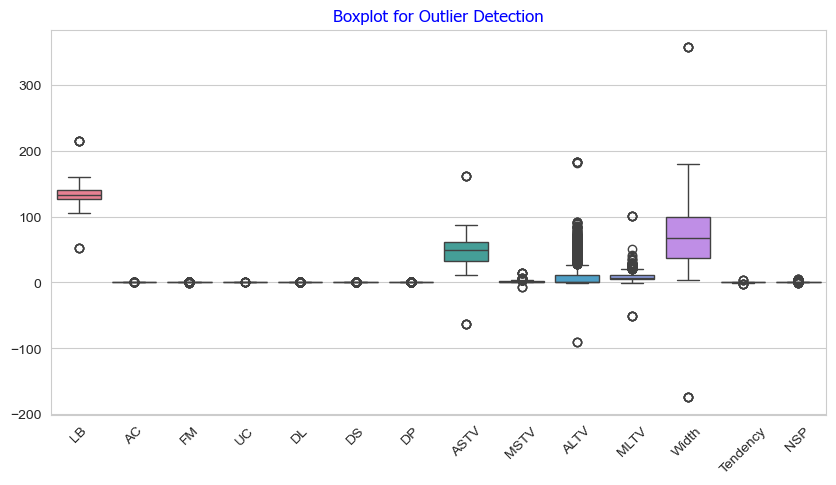

In [268]:
# Detect Outliers using Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title("Boxplot for Outlier Detection",fontname='Tahoma',fontsize=12, color='blue');
plt.xticks(rotation=45)
plt.show()

In [269]:
# Outlier Capping using IQR method (numerical column)

def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)   # 25th percentile
    Q3 = df[col].quantile(0.75)   # 75th percentile
    IQR = Q3 - Q1
    
# Define lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
# Replace values outside the limits
    df[col] = np.where(df[col] < lower_limit, lower_limit,
                       np.where(df[col] > upper_limit, upper_limit, df[col]))
    return df

# Apply outlier capping to all numerical columns
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    df = cap_outliers(df, col)

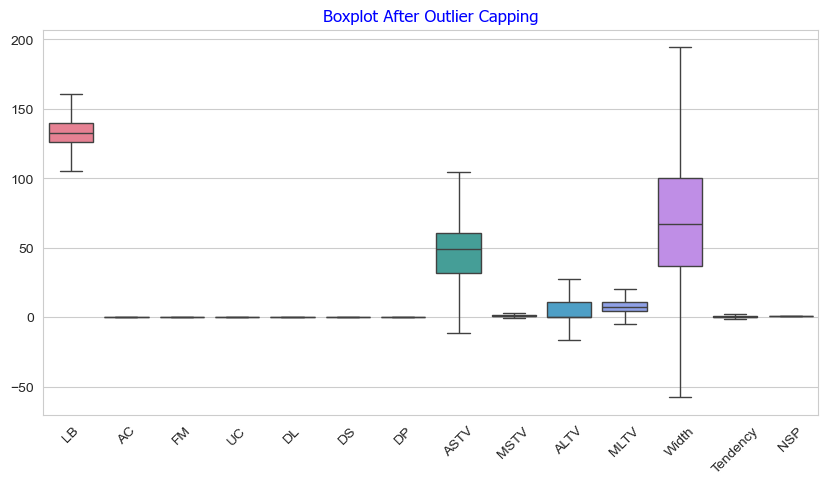

In [270]:
# plot Boxplot again to check if outliers are capped
plt.figure(figsize=(10,5))
sns.boxplot(data=df[num_cols])
plt.title("Boxplot After Outlier Capping",fontname='Tahoma',fontsize=12, color='blue');
plt.xticks(rotation=45)
plt.show()

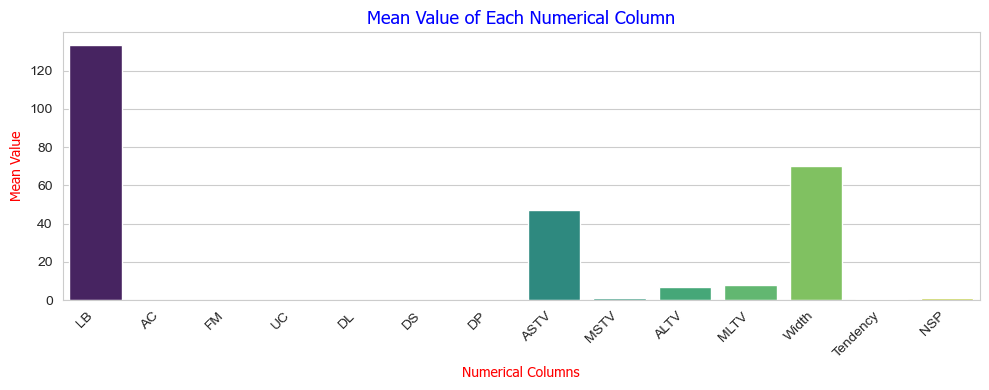

Bar chart of mean values for numerical features plotted.


In [271]:
# Bar chart of column means
# Calculate the mean of each numerical column
numerical_means = df[num_cols].mean()

plt.figure(figsize=(10, 4))
sns.barplot(x=numerical_means.index, y=numerical_means.values, palette='viridis')
plt.title("Mean Value of Each Numerical Column",fontname='Tahoma',fontsize=13, color='blue')
plt.ylabel("Mean Value",fontname='Tahoma',fontsize=10, color='red')
plt.xlabel("Numerical Columns",fontname='Tahoma',fontsize=10, color='red')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Bar chart of mean values for numerical features plotted.")

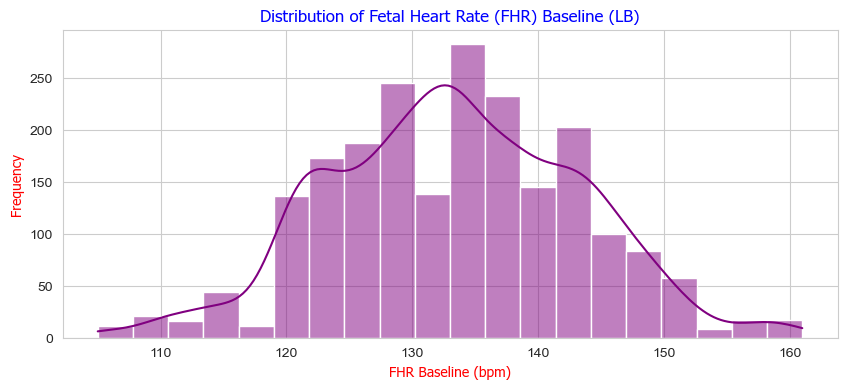

Distribution of FHR Baseline plotted.


In [272]:
# Plot the distribution of the 'LB' (FHR baseline)
plt.figure(figsize=(10, 4))
sns.histplot(df['LB'], bins=20, kde=True, color='purple')
plt.title("Distribution of Fetal Heart Rate (FHR) Baseline (LB)",fontname='Tahoma',fontsize=12, color='blue')
plt.xlabel("FHR Baseline (bpm)",fontname='Tahoma',fontsize=10, color='red')
plt.ylabel("Frequency",fontname='Tahoma',fontsize=10, color='red')
plt.show()
print("Distribution of FHR Baseline plotted.")


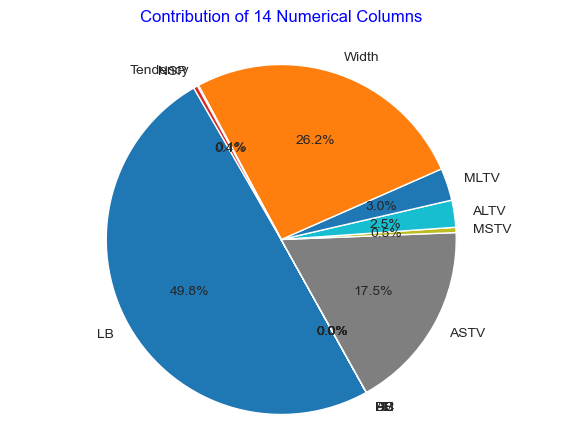

In [273]:
# pie chart of all numerical columns
columns_to_plot = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']
sums_for_pie_chart = df[columns_to_plot].sum()
plt.figure(figsize=(7, 5))

# 'labels' uses the column names as labels for each slice.
# 'autopct' adds the percentage values to each slice.
plt.pie(sums_for_pie_chart, labels=sums_for_pie_chart.index, autopct='%1.1f%%', startangle=120)
plt.axis('equal')
plt.title("Contribution of 14 Numerical Columns\n",color='blue')
plt.show()

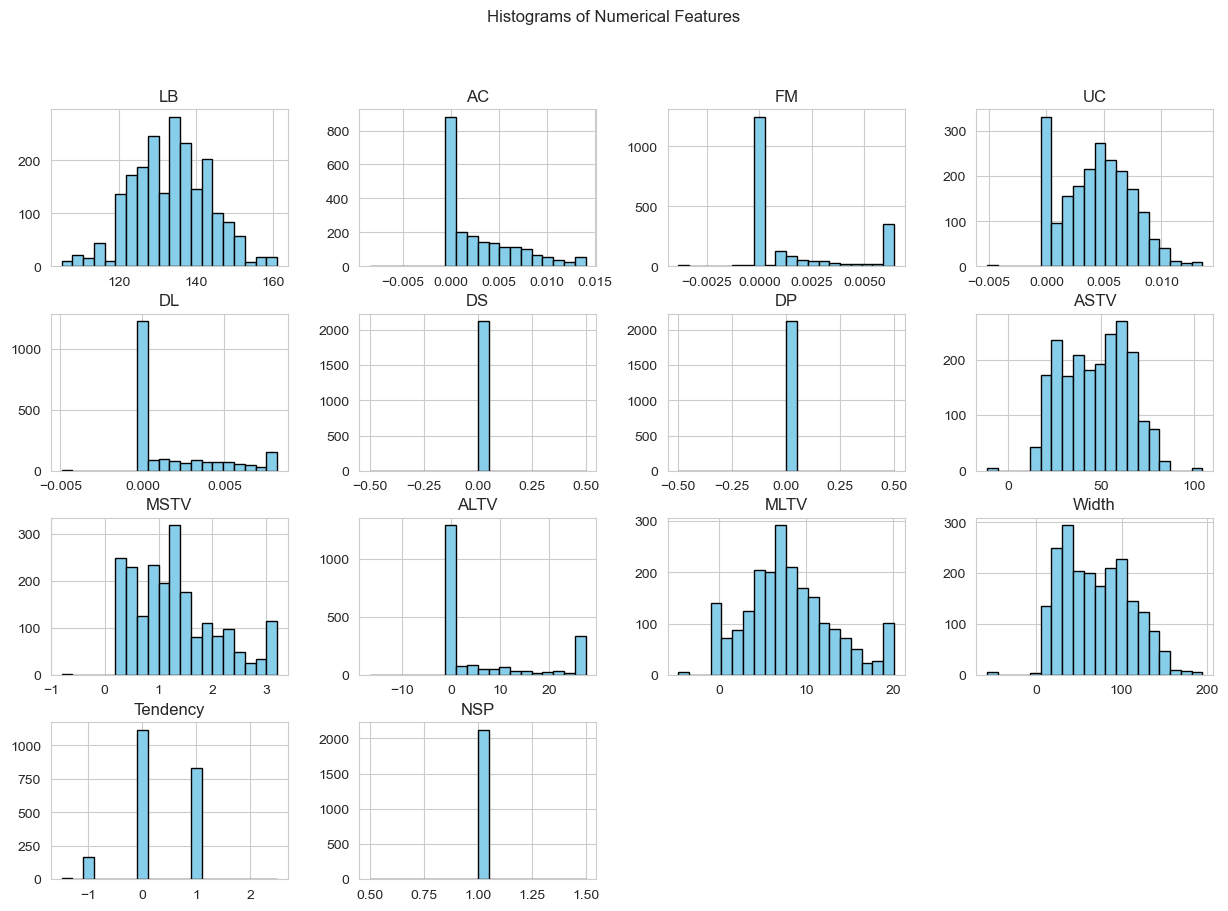

In [274]:
# Distribution Plots (Histograms for numerical variables)
df.hist(figsize=(15,10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

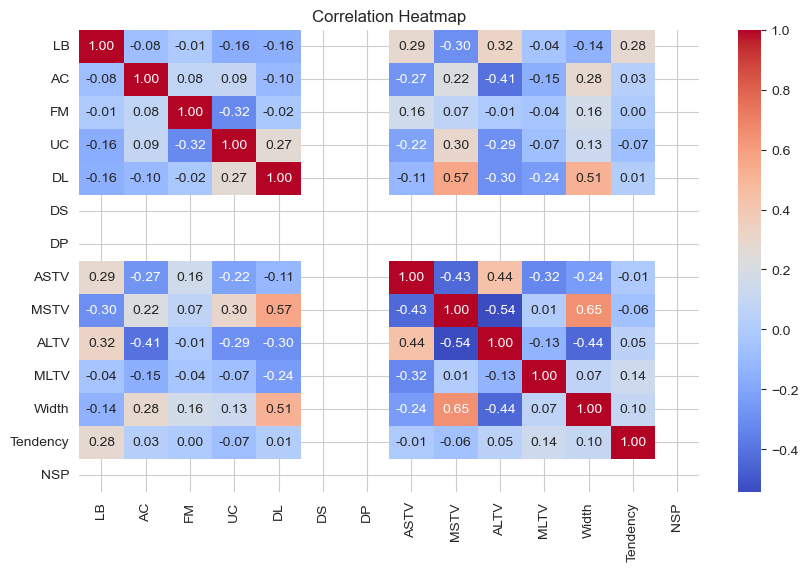

In [275]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


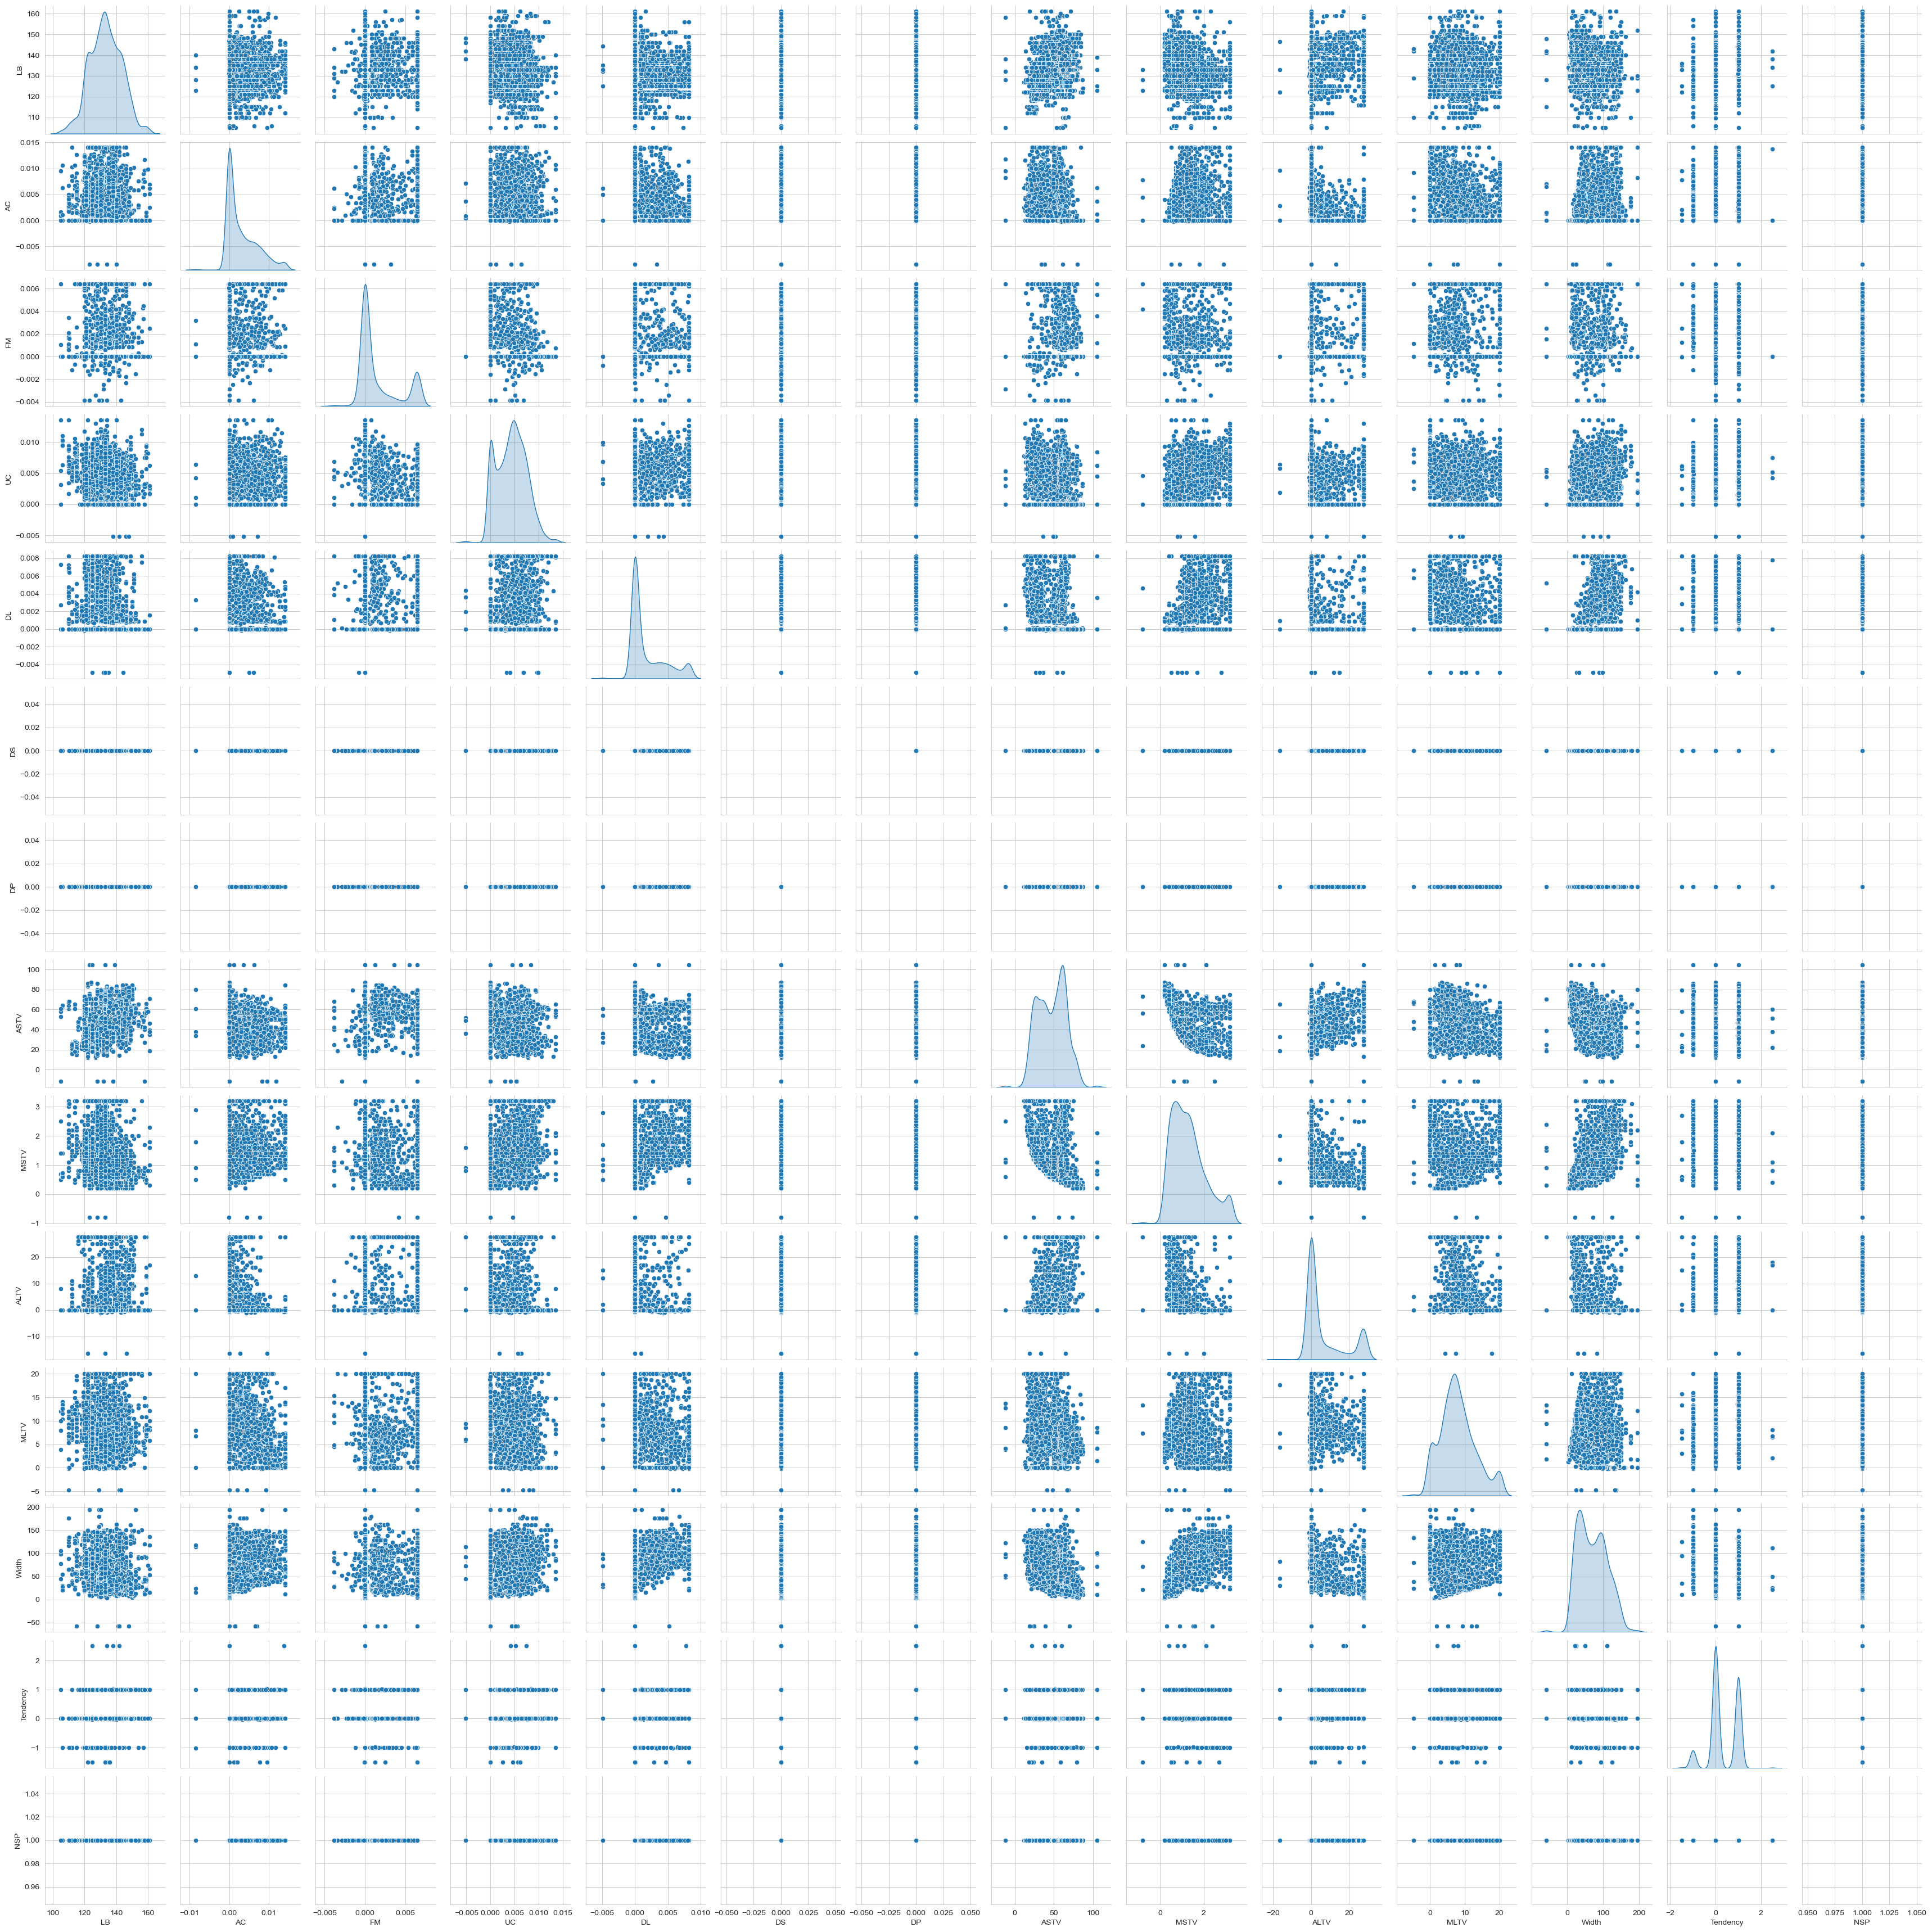

In [276]:
# Pairplot for deeper insights
sns.pairplot(df, diag_kind='kde')
plt.show()

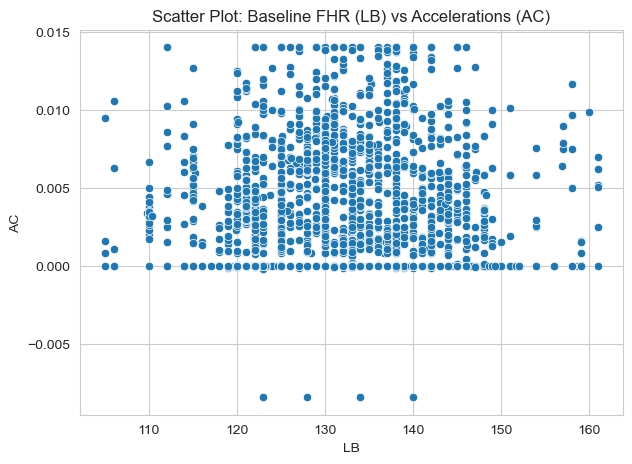

In [277]:
# Scatter plots between important variables
plt.figure(figsize=(7,5))
sns.scatterplot(x='LB', y='AC', data=df)
plt.title("Scatter Plot: Baseline FHR (LB) vs Accelerations (AC)")
plt.show()


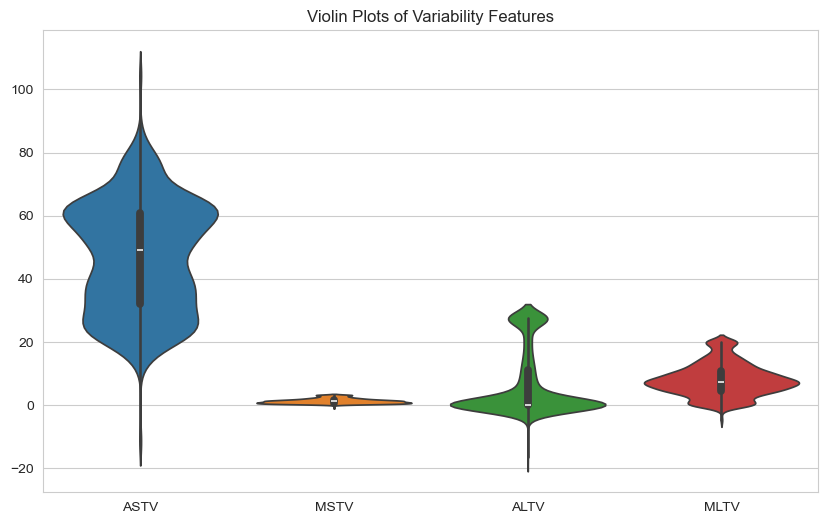

In [278]:
# Violin Plot for variability features
plt.figure(figsize=(10,6))
sns.violinplot(data=df[['ASTV','MSTV','ALTV','MLTV']])
plt.title("Violin Plots of Variability Features")
plt.show()

In [279]:
# Final Observations
# Check correlations of LB with other features
print("\nCorrelation of LB (Baseline FHR) with other features:")
print(df.corr()['LB'].sort_values(ascending=False))



Correlation of LB (Baseline FHR) with other features:
LB          1.000000
ALTV        0.322431
ASTV        0.285623
Tendency    0.280796
FM         -0.006929
MLTV       -0.042578
AC         -0.080759
Width      -0.140015
DL         -0.156260
UC         -0.162811
MSTV       -0.295600
DS               NaN
DP               NaN
NSP              NaN
Name: LB, dtype: float64


#### Brief Report Summary

##### Exploratory Data Analysis Report on Cardiographic Dataset

##### 1. Objective

The goal of this analysis was to explore the cardiographic.csv dataset, understand its structure, detect patterns, and extract meaningful insights regarding fetal heart rate (FHR) and related variables.

##### 2. Data Cleaning & Preparation

* Loaded dataset into a Pandas DataFrame.

* Handled missing values by imputing medians (since features are numerical).

* Verified data types and ensured consistency.

* Outliers detected through boxplots and visually confirmed in several variables (especially LB, AC, UC).

##### 3. Statistical Summary

* Baseline Fetal Heart Rate (LB): Average around normal physiological range (~120–140 bpm).

* Accelerations (AC): Highly variable, median close to 0 for many cases, indicating many patients have fewer accelerations.

* Uterine Contractions (UC): Shows skewed distribution, majority at lower frequencies.

* Variability Measures (ASTV, MSTV, ALTV, MLTV): Provide crucial information on fetal well-being.

* Dispersion (Std. Dev & IQR) suggests strong variability in patient conditions.

##### 4. Visualizations & Patterns

* Histograms: Most features are right-skewed (especially accelerations and uterine contractions).

* Boxplots: Outliers present in LB, AC, and UC – possibly reflecting abnormal clinical cases.

* Correlation Heatmap:

* LB shows weak correlation with most features (as expected, FHR baseline is independent).

* Strong relationships found among variability measures (ASTV, MSTV, ALTV, MLTV).

* Scatterplots: Some relationship observed between LB (Baseline FHR) and AC (Accelerations).

* Violin Plots: Show clear spread and skewness in variability-related variables.

* Pair Plots: Suggest clusters in variability features that may help in classification of fetal health status.

##### 5. Key Insights

* Variability Measures (ASTV, MSTV, ALTV, MLTV) are the most informative features, as they show clear distributions and correlations.

* Accelerations (AC) and Fetal Movements (FM) are mostly sparse, but when present, they indicate better fetal health.

* Decelerations (DL, DS, DP) occur infrequently but may indicate fetal distress when combined with high ASTV or ALTV values.

* Outliers in LB and AC may represent clinical cases of concern and need further medical attention.

##### 6. Conclusion

This exploratory analysis revealed that:

* The dataset contains several clinically relevant features with significant variability.

* Variability measures (ASTV, MSTV, ALTV, MLTV) and decelerations (DL, DS, DP) play a crucial role in detecting fetal distress.

* Patterns suggest the possibility of clustering patients into risk groups, which could support predictive modeling for fetal health classification.

##### 7. Recommendations for Further Analysis

* Apply clustering techniques (e.g., KMeans) to group patients based on variability patterns.

* Build a predictive model (e.g., Logistic Regression, Random Forest, or Neural Networks) to classify fetal health status.

* Perform feature importance analysis to confirm clinical relevance.

                                                                                     Submitted by: Meghana C Varghese